In [86]:
# Projet issu des données suivantes :

# https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [87]:
# Importation des library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [88]:
# Import des données

df_train = pd.read_csv('train.csv', sep = ',')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [89]:
# Obtenir les noms des variables
noms_variables = df_train.columns

# Afficher les noms des variables
print(noms_variables)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


On décide de modifier le nom de nos variables ainsi que des modalités de la variable à expliquer

In [90]:
# modification des noms des variables
df_train = df_train.rename(columns={'battery_power': 'puissance_batterie', 
                         'blue': 'Bluetooth', 
                         'clock_speed': 'vitesse_micro_pross', 
                         'fc': 'nb_pixels_camera_front', 
                         'four_g': '4G', 
                         'int_memory': 'mémoire_interne',
                         'm_dep': 'profondeur_tel',
                         'mobile_wt': 'poids_tel',
                         'n_cores': 'nb_coeurs',
                         'pc': 'nb_pixels_camera_externe',
                         'px_height': 'pixels_resolution_hauteur',
                         'px_width': 'pixels_resolution_largeur',
                         'sc_h': 'hauteur_tel',
                         'sc_w': 'largeur_tel',
                         'talk_time': 'duree_batterie_appel',
                         'three_g': '3G',
                         'touch_screen': 'ecran_tactile'})

In [91]:
# Remplacer les modalités dans la colonne
nouveaux_noms_modalites = {0: 'bas de gamme', 1: 'prix moyen', 2: 'prix élevé', 3: 'haut de gamme'}
df_train['price_range'] = df_train['price_range'].replace(nouveaux_noms_modalites)

# Afficher les modalités de la colonne
modalites = df_train['price_range'].unique()

# Afficher les modalités
print("Modalités de la price_range :", modalites)

Modalités de la price_range : ['prix moyen' 'prix élevé' 'haut de gamme' 'bas de gamme']


In [92]:
# On sépare la variable à expliquer des variables explicatives
X = df_train.drop("price_range",axis=1)
y = df_train['price_range']

In [93]:
# On split le train et le test à 80 % et 20 %
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0, stratify=y)

In [94]:
# On prévoit d'utiliser le scaler pour centrer et réduire les variables quantitatives
scaler = StandardScaler()

In [95]:
# On applique le scaler à nos échantillons
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
# Application de la regression logistique sur notre échantillon d'apprentissage
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [97]:
# Création de la pipeline
pLg = make_pipeline(StandardScaler(),
                    LogisticRegression(max_iter=1000,C=0.1))
pLg.fit(X_train, y_train)
print(pLg.score(X_train, y_train), pLg.score(X_test, y_test))

0.95 0.935


In [98]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Convertir la matrice de confusion en pourcentage
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

print("-------------------------------------------------------------------------")
print(f"L'accuracy est de : ------>>  {accuracy_score(y_test, y_pred)}")
print("-------------------------------------------------------------------------")
print(f"La matrice de confusion (%) est la suivante : ------>> \n{conf_matrix_percent}")
print("-------------------------------------------------------------------------")
print(f"Tableau récapitulatif : ---->> {classification_report(y_test, y_pred)}")

-------------------------------------------------------------------------
L'accuracy est de : ------>>  0.9725
-------------------------------------------------------------------------
La matrice de confusion (%) est la suivante : ------>> 
[[97.  0.  3.  0.]
 [ 0. 99.  0.  1.]
 [ 2.  0. 95.  3.]
 [ 0.  0.  2. 98.]]
-------------------------------------------------------------------------
Tableau récapitulatif : ---->>                precision    recall  f1-score   support

 bas de gamme       0.98      0.97      0.97       100
haut de gamme       1.00      0.99      0.99       100
   prix moyen       0.95      0.95      0.95       100
   prix élevé       0.96      0.98      0.97       100

     accuracy                           0.97       400
    macro avg       0.97      0.97      0.97       400
 weighted avg       0.97      0.97      0.97       400



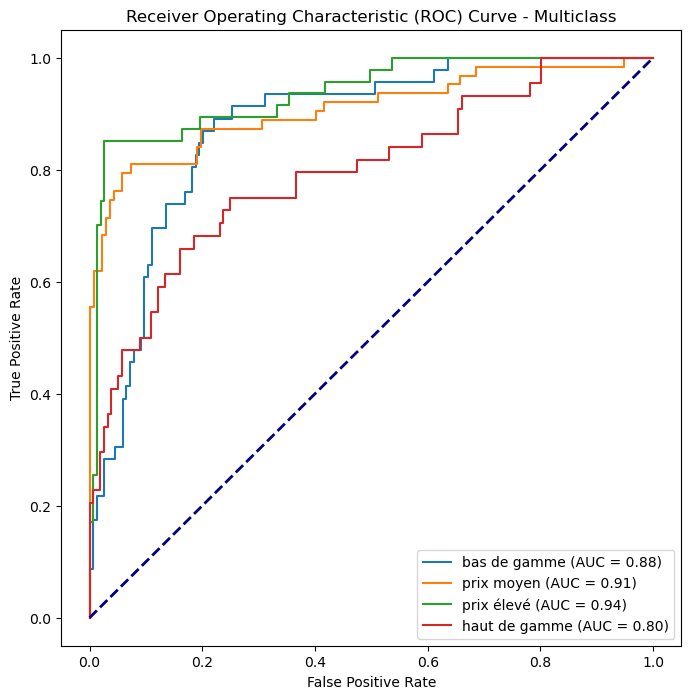

In [99]:
# Création de la courbe de ROC

# Générer des données de démonstration
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=42)

# Binariser les étiquettes
y_bin = label_binarize(y, classes=[0, 1, 2, 3])

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Utiliser OneVsRestClassifier avec un classificateur binaire (par exemple, Logistic Regression)
classifier = OneVsRestClassifier(LogisticRegression())

# Ajuster le modèle
classifier.fit(X_train, y_train)

# Obtenir les scores des probabilités
y_score = classifier.predict_proba(X_test)

# Calculer les courbes ROC et les aires sous la courbe pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # 4 classes dans cet exemple
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes ROC
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'{nouveaux_noms_modalites[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

In [102]:
# Convertir les données en DataFrame Pandas avec des noms de colonnes
columns = [f'Feature_{i}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=columns)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Créer et ajuster le modèle de régression logistique pour chaque classe spécifique
for classe_specifique in np.unique(y):
    # Créer et ajuster le modèle de régression logistique pour la classe spécifique
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, (y_train == classe_specifique).astype(int))

    # Obtenir les coefficients avec les noms des variables
    coefficients = model.coef_

    # Afficher les coefficients avec les noms des variables
    print(f'Coefficients pour la classe {classe_specifique}:')
    for j, coef in enumerate(coefficients[0]):
        print(f'{df_train.columns[j]}: {coef}')
    print("\n")

Coefficients pour la classe 0:
puissance_batterie: -0.008666737180480347
Bluetooth: 0.3253838204792528
vitesse_micro_pross: -0.007285305856656424
dual_sim: -0.05703754383294947
nb_pixels_camera_front: -0.05807922269258151
4G: -0.28033242314101076
mémoire_interne: 0.043041627407530925
profondeur_tel: 0.046077884367161016
poids_tel: 0.0460872901825854
nb_coeurs: 0.0399121728027788
nb_pixels_camera_externe: -0.07808046775178075
pixels_resolution_hauteur: -0.27972148606509256
pixels_resolution_largeur: 0.07788004811549955
ram: -0.07119349738768545
hauteur_tel: -0.4948493734602192
largeur_tel: -0.02187447209174078
duree_batterie_appel: -0.05427772557529652
3G: -0.0372380435946534
ecran_tactile: 0.24616889284741467
wifi: -0.03497729926726071


Coefficients pour la classe 1:
puissance_batterie: 0.004765920859526669
Bluetooth: 0.04364435099640051
vitesse_micro_pross: 0.1140240217600803
dual_sim: 0.03395689000032007
nb_pixels_camera_front: -0.0337153405787394
4G: 0.6304326106657738
mémoire_inte